In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# GitHub Analysis
## This is a pretty simple and cleaned data.

In [2]:
# Creating a dataset from the csv file.

git_data = pd.read_csv(r'C:\Users\张睿堃\Desktop\数据挖掘\作业\第三周\dataset_github\github_dataset.csv')
git_data

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


In [3]:
# Checking the shape of the dataframe

git_data.shape

(1052, 7)

In [4]:
# Checking the null values in the DataFrame 

git_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   repositories   1052 non-null   object
 1   stars_count    1052 non-null   int64 
 2   forks_count    1052 non-null   int64 
 3   issues_count   1052 non-null   int64 
 4   pull_requests  1052 non-null   int64 
 5   contributors   1052 non-null   int64 
 6   language       907 non-null    object
dtypes: int64(5), object(2)
memory usage: 57.7+ KB


In [5]:
# Checking the null values in 'language' column of the DataFrame

git_data.language.isnull().value_counts()

language
False    907
True     145
Name: count, dtype: int64

In [6]:
# Filling the empty values in 'language' column. 

git_data.language = git_data.language.fillna('No specified language')
git_data.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,No specified language
1,EddieHubCommunity/support,271,150,536,6,71,No specified language
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


In [7]:
# Extractiing the repository name from 'repositories'

git_data['repository_name'] = git_data.repositories.str.split('/').str[1]
git_data['repository_name']

0                     Hello-World
1                         support
2                           aleth
3                      localstack
4                       classroom
                  ...            
1047            canvas-astar.dart
1048             github-slideshow
1049    interactive_cpu_scheduler
1050                  voting_dapp
1051               All_PropHealth
Name: repository_name, Length: 1052, dtype: object

In [8]:
# Extracting the name of users from 'repositories'

git_data['user_name'] = git_data.repositories.str.split('/').str[0]
git_data['user_name']

0                 octocat
1       EddieHubCommunity
2                ethereum
3              localstack
4               education
              ...        
1047               Tyriar
1048      ankitkumar70777
1049           aitikgupta
1050           gwmccubbin
1051             gamemann
Name: user_name, Length: 1052, dtype: object

In [9]:
# checking the dataframe after the changes 
git_data

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language,repository_name,user_name
0,octocat/Hello-World,0,0,612,316,2,No specified language,Hello-World,octocat
1,EddieHubCommunity/support,271,150,536,6,71,No specified language,support,EddieHubCommunity
2,ethereum/aleth,0,0,313,27,154,C++,aleth,ethereum
3,localstack/localstack,0,0,290,30,434,Python,localstack,localstack
4,education/classroom,0,589,202,22,67,Ruby,classroom,education
...,...,...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart,canvas-astar.dart,Tyriar
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML,github-slideshow,ankitkumar70777
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python,interactive_cpu_scheduler,aitikgupta
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript,voting_dapp,gwmccubbin


In [10]:
# removing 'repositories' column as we have already extracted the information from it.

git_data = git_data.drop(['repositories'], axis=1)

In [11]:
git_data

,stars_count,forks_count,issues_count,pull_requests,contributors,language,repository_name,user_name
0,0,0,612,316,2,No specified language,Hello-World,octocat
1,271,150,536,6,71,No specified language,support,EddieHubCommunity
2,0,0,313,27,154,C++,aleth,ethereum
3,0,0,290,30,434,Python,localstack,localstack
4,0,589,202,22,67,Ruby,classroom,education
...,...,...,...,...,...,...,...,...
1047,2,1,1,0,0,Dart,canvas-astar.dart,Tyriar
1048,0,0,1,0,8,HTML,github-slideshow,ankitkumar70777
1049,0,5,1,1,7,Python,interactive_cpu_scheduler,aitikgupta
1050,11,5,1,0,0,JavaScript,voting_dapp,gwmccubbin


## This is it for the data manipulation, I guess. Nothing much to do. 

# Data Visualization

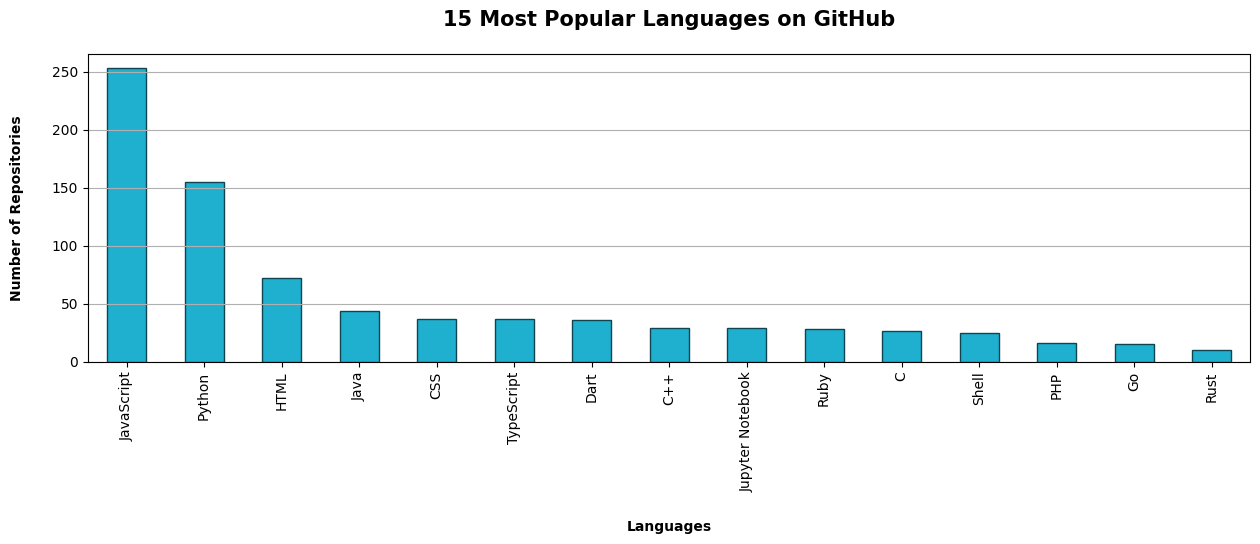

In [12]:
# Creating the plot for the most popular 15 languages in the dataset

lang = git_data.loc[git_data.language != 'No specified language']
lang.language.value_counts()[:15].plot(kind = 'bar', figsize = (15,4), color = '#20b0cf', edgecolor = '#0e4551')
plt.xlabel('Languages', fontweight = 'bold', labelpad = 20)
plt.ylabel('Number of Repositories', fontweight = 'bold', labelpad = 20)
plt.title('15 Most Popular Languages on GitHub', fontweight = 'bold', fontsize = 15, pad = 20)
plt.grid(axis = 'y')
plt.show()

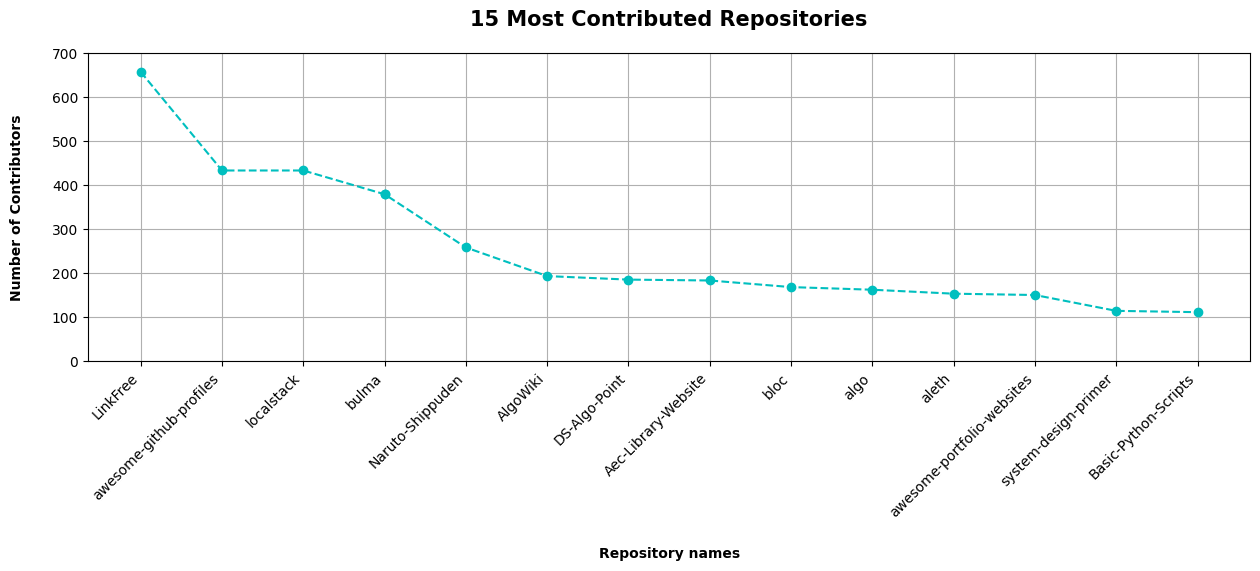

In [13]:
# Creating the plot for the top 15 most contributed repositories.

top_contri = git_data.sort_values(by = 'contributors', ascending= False)[:15]
plt.figure(figsize =  (15, 4))
plt.plot(top_contri.repository_name, top_contri.contributors, 'c--o')
plt.xlabel('Repository names', fontweight = 'bold', labelpad = 20)
plt.ylabel('Number of Contributors', fontweight = 'bold', labelpad = 20)
plt.xticks(rotation = 45, ha = 'right')
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700])
plt.title('15 Most Contributed Repositories', fontweight = 'bold', pad = 20, fontsize = 15)
plt.grid()
plt.show()

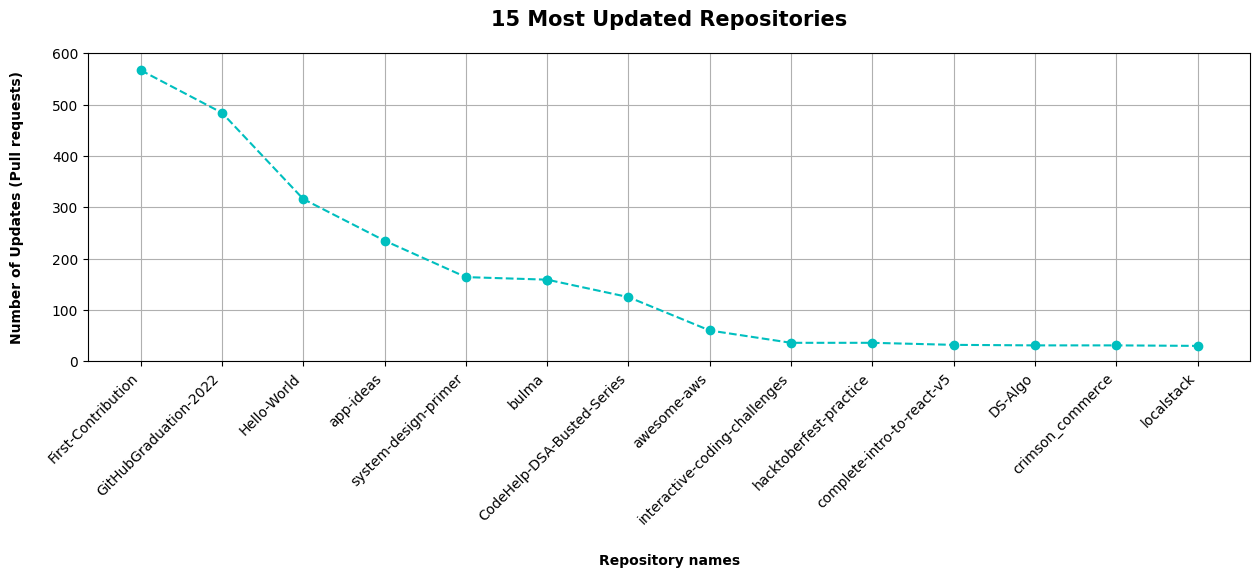

In [14]:
# Creating the plot for the top 15 most updated repositories.

top_updates = git_data.sort_values(by = 'pull_requests', ascending= False)[:15]
plt.figure(figsize =  (15, 4))
plt.plot(top_updates.repository_name, top_updates.pull_requests, 'c--o')
plt.xlabel('Repository names', fontweight = 'bold', labelpad = 20)
plt.ylabel('Number of Updates (Pull requests)', fontweight = 'bold', labelpad = 20)
plt.xticks(rotation = 45, ha = 'right')
plt.yticks([0, 100, 200, 300, 400, 500, 600])
plt.title('15 Most Updated Repositories', fontweight = 'bold', pad = 20, fontsize = 15)
plt.grid()
plt.show()

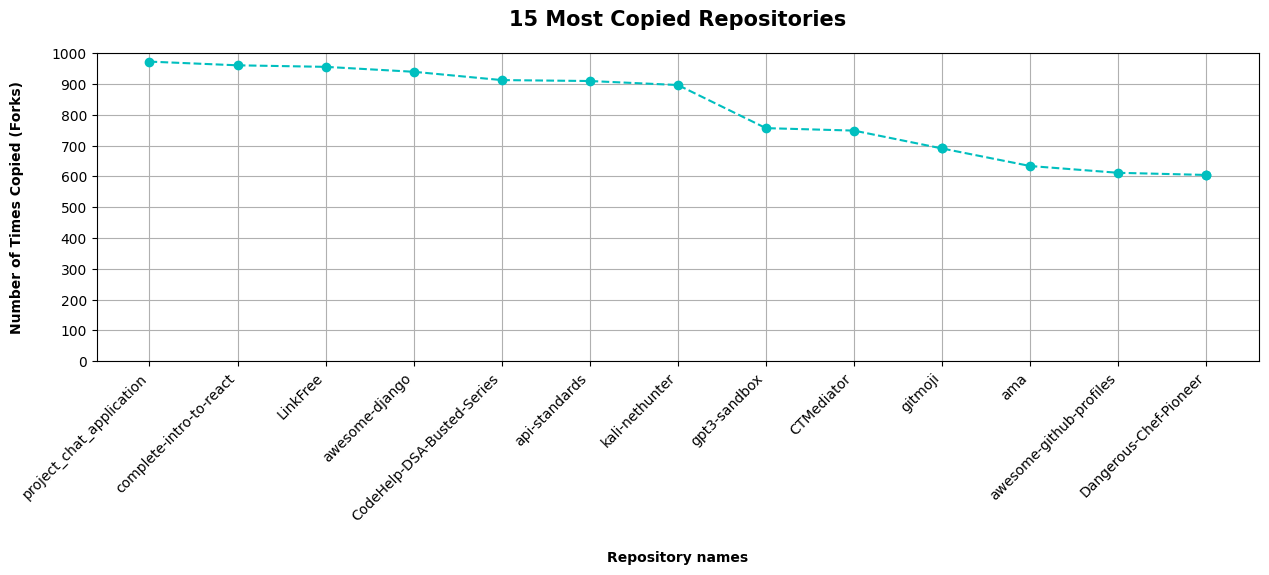

In [15]:
# Creating the plot for the top 15 most copied repositories, i.e. forked.

top_forked = git_data.sort_values(by = 'forks_count', ascending= False)[:15]
plt.figure(figsize =  (15, 4))
plt.plot(top_forked.repository_name, top_forked.forks_count, 'c--o')
plt.xlabel('Repository names', fontweight = 'bold', labelpad = 20)
plt.ylabel('Number of Times Copied (Forks)', fontweight = 'bold', labelpad = 20)
plt.xticks(rotation = 45, ha = 'right')
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
plt.title('15 Most Copied Repositories', fontweight = 'bold', pad = 20, fontsize = 15)
plt.grid()
plt.show()

# WE ARE DONE!!